In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("GOOG.csv")

In [5]:
print(data.head(5))

       Close
0  49.982655
1  53.952770
2  54.495735
3  52.239193
4  52.802086


In [6]:
print(data.size)

3809


In [7]:
print(data.info)

<bound method DataFrame.info of             Close
0       49.982655
1       53.952770
2       54.495735
3       52.239193
4       52.802086
...           ...
3804  1219.000000
3805  1205.099976
3806  1176.630005
3807  1187.829956
3808  1209.000000

[3809 rows x 1 columns]>


In [8]:
data=data[["Close"]]
data.dropna(inplace=True)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(data)

In [10]:
def create_sequences(data,sequence_length):
    X,Y=[],[]
    for i in range(sequence_length,len(data)):
        X.append(data[i-sequence_length:i,0])
        Y.append(data[i,0])
    return np.array(X),np.array(Y)

In [12]:
sequence_length=60
X,Y=create_sequences(data_scaled,sequence_length)

In [16]:
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [30]:
split=int(0.8*len(X))
X_train,X_test=X[:split],X[split:]
Y_train,Y_test=Y[:split],Y[split:]

In [31]:
model=keras.Sequential([
    layers.SimpleRNN(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
    layers.SimpleRNN(50),
    layers.Dense(1)
    
])

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
history=model.fit(X_train,Y_train,epochs=50,batch_size=32,validation_split=0.1,verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0536 - val_loss: 0.0016
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5921e-04 - val_loss: 0.0011
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7258e-04 - val_loss: 0.0011
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3296e-04 - val_loss: 6.2877e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3201e-04 - val_loss: 9.5416e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3219e-04 - val_loss: 9.4066e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2363e-04 - val_loss: 7.5109e-04
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4678e-04 - val_loss: 3.6327e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4262e-04 - val_loss: 4.6745e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3776e-04 - val_loss: 3.9327e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3878e-04 - val_loss: 2.

In [34]:
loss=model.evaluate(X_test,Y_test)
print(f"Test Loss: {loss:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011    
Test Loss: 0.0020


In [35]:
predicted_stock_price=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [36]:
predicted_stock_price=scaler.inverse_transform(predicted_stock_price.reshape(-1,1))
y_test_scaled=scaler.inverse_transform(Y_test.reshape(-1,1))

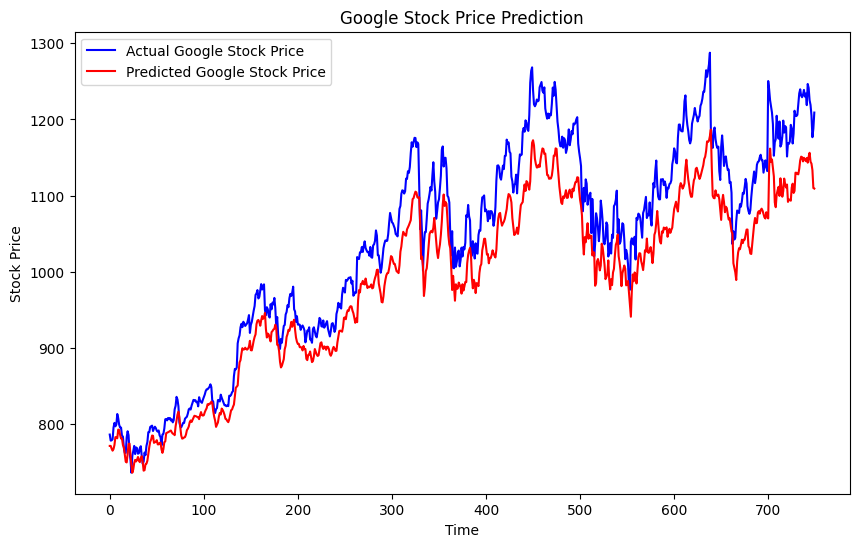

In [37]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()